In [243]:
# -*- coding: utf-8 -*-
%matplotlib inline

import re
import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
import arrow
from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')

In [244]:
# Import overview data
debt_size = pd.read_csv('data/debt-size-2017_fy-q3.csv')
by_age = pd.read_csv('data/portfolio-by-age.csv')
by_age_clean = pd.read_csv('data/portfolio-by-age-cleaned.csv')
by_location = pd.read_csv('data/portfolio-by-location.csv')
by_school_type = pd.read_csv('data/portfolio-by-school-type.csv')
by_school_type_latest = pd.read_csv('data/portfolio-by-school-type-reworked.csv')
summary = pd.read_csv('data/portfolio-summary.csv', dtype={'Federal Fiscal Year':'str'})
population = pd.read_csv('data/population.csv')

In [245]:
# Functions
def classify(string):
    string = re.sub(r'\(|\)', '', string)
    classified = string.lower().strip().replace(' ','-')
    return classified

def find_share(num,total):
    return round((num / total)*100, 2)

def removeSpecChars(string):
    string = string.replace('$','')
    string = string.replace(',','')
    num = float(string)
    return num

### TODO: 
- ~~Five percent of student borrowers owe more than 100,000 in federal student loans while 57 percent of borrowers owe less than 20,000~~
- ~~Student loan recipients living in Washington, D.C. have, on average, the highest student loan balance, roughly 50,000~~
- More than a quarter of a million borrowers, 1.6 percent of all student loan recipients, defaulted on their loans in Fiscal Year 2017**
- 42 percent of outstanding student loans are from public colleges and universities, 32 percent from private schools, and the remainder from proprietary and foreign institutions

### Portfolio summary
TKTK

In [246]:
summary.rename(columns=lambda c: classify(c), inplace=True)
summary = summary.drop(25)
summary

,federal-fiscal-year,federal-fiscal-quarter,direct-loans-dollars-outstanding-in-billions,direct-loans-recipients-in-millions,ffel-dollars-outstanding-in-billions,ffel-dollars-recipients-in-millions,perkins-dollars-outstanding-in-billions,perkins--recipients-in-millions,total-dollars-outstanding-in-billions,total-unduplicated-recipients-in-millions
0,2007,AQ,106.8,7.0,401.9,22.6,8.2,2.8,516.0,28.3
1,2008,AQ,122.5,7.7,446.5,23.7,8.5,2.9,577.0,29.9
2,2009,AQ,154.9,9.2,493.3,25.0,8.7,3.0,657.0,32.1
3,2010,AQ,224.5,14.4,516.7,25.1,8.4,2.9,749.8,34.3
4,2011,AQ,350.1,19.4,489.8,23.8,8.3,2.9,848.2,36.5
5,2012,AQ,488.3,22.8,451.7,22.4,8.2,2.9,948.2,38.3
6,2013,Q1,508.7,23.4,444.9,22.1,8.2,3.0,961.9,38.7
7,2013,Q2,553.0,24.1,437.0,21.6,8.3,3.0,998.6,38.9
8,2013,Q3,569.2,24.3,429.5,21.2,8.2,2.9,1006.8,38.7
9,2013,Q4,609.1,25.6,423.0,20.9,8.1,2.9,1040.2,39.6


In [247]:
# summary['total-perc'] = np.vectorize(find_share)(summary['total-dollars-outstanding-in-billions'],summary['total-unduplicated-recipients-in-millions'])
summary

,federal-fiscal-year,federal-fiscal-quarter,direct-loans-dollars-outstanding-in-billions,direct-loans-recipients-in-millions,ffel-dollars-outstanding-in-billions,ffel-dollars-recipients-in-millions,perkins-dollars-outstanding-in-billions,perkins--recipients-in-millions,total-dollars-outstanding-in-billions,total-unduplicated-recipients-in-millions
0,2007,AQ,106.8,7.0,401.9,22.6,8.2,2.8,516.0,28.3
1,2008,AQ,122.5,7.7,446.5,23.7,8.5,2.9,577.0,29.9
2,2009,AQ,154.9,9.2,493.3,25.0,8.7,3.0,657.0,32.1
3,2010,AQ,224.5,14.4,516.7,25.1,8.4,2.9,749.8,34.3
4,2011,AQ,350.1,19.4,489.8,23.8,8.3,2.9,848.2,36.5
5,2012,AQ,488.3,22.8,451.7,22.4,8.2,2.9,948.2,38.3
6,2013,Q1,508.7,23.4,444.9,22.1,8.2,3.0,961.9,38.7
7,2013,Q2,553.0,24.1,437.0,21.6,8.3,3.0,998.6,38.9
8,2013,Q3,569.2,24.3,429.5,21.2,8.2,2.9,1006.8,38.7
9,2013,Q4,609.1,25.6,423.0,20.9,8.1,2.9,1040.2,39.6


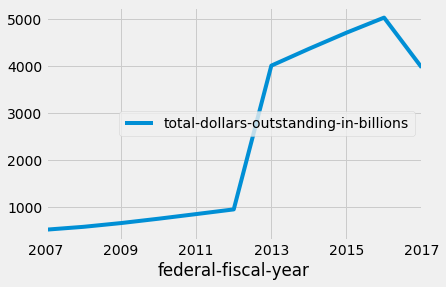

In [248]:
# Group columns by year and sum 
summary_summedByYear = summary.groupby('federal-fiscal-year').sum().reset_index()
summary_summedByYear.plot(kind='line', x='federal-fiscal-year', y='total-dollars-outstanding-in-billions')

### Work with the debt size data
TKTK

In [249]:
# NOTE: this is amount left in loan, not the amount originally taken out

# convert dollars to number and drop old column
debt_size['dollars_amt'] = debt_size['dollars_outstanding'].str.extract('\$(.*)', expand=True)
debt_size['dollars_amt'] = pd.to_numeric(debt_size['dollars_amt'])
debt_size = debt_size.drop('dollars_outstanding', axis=1)

In [250]:
# Add up the number of borrowers to find the percentage
num_borrowers_sum = debt_size['num_borrowers'].sum()
num_borrowers_sum

# Use `find_share` function to calculate the percentage of borrowers
debt_size['perc_of_borrowers'] = np.vectorize(find_share)(debt_size['num_borrowers'],num_borrowers_sum)
debt_size['perc_of_borrowers'].sum()
debt_size

,borrow_amt,num_borrowers,dollars_amt,perc_of_borrowers
0,<5K,8.0,20.8,18.06
1,5K to 10K,7.8,56.7,17.61
2,10K to 20K,9.5,136.5,21.44
3,20K to 40K,9.3,265.0,20.99
4,40K to 60K,3.9,191.9,8.80
5,60K to 80K,2.3,157.6,5.19
6,80K-100K,1.1,95.3,2.48
7,100K to 200K,1.8,251.1,4.06
8,200K+,0.6,167.2,1.35


In [251]:
debt_size_cond = debt_size.replace({'borrow_amt': {'<5K':'<10K','5K to 10K':'<10K'}}).groupby('borrow_amt',sort=False).sum().reset_index()


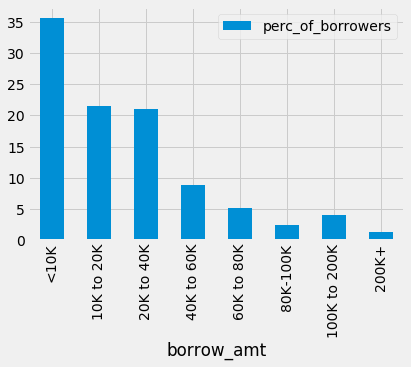

In [252]:
# Plot percentage of borrowers
debt_size_cond.plot(kind='bar', x='borrow_amt', y='perc_of_borrowers')
# debt_size.info()

In [253]:
over100k = debt_size[(debt_size['borrow_amt'] == '100K to 200K') ^ (debt_size['borrow_amt'] == '200K+')].sum()
under20k = debt_size[(debt_size['borrow_amt'] == '<5K') ^ (debt_size['borrow_amt'] == '5K to 10K') ^ (debt_size['borrow_amt'] == '10K to 20K')].sum()

print('%s percent of borrowers have over 100k in outstanding debt, while %s percent of borrowers have under 20k in debt' % (over100k['perc_of_borrowers'],under20k['perc_of_borrowers']))

5.41 percent of borrowers have over 100k in outstanding debt, while 57.11 percent of borrowers have under 20k in debt


### Portfolios by age

In [254]:
list(by_age)
by_age = by_age.drop({'Unnamed: 16','Unnamed: 17'}, axis=1)

In [255]:
by_age.rename(columns=lambda c: classify(c), inplace=True)
by_age

,federal-fiscal-year,federal-fiscal-quarter,18-or-younger-dollars-outstanding-in-billions,18-or-younger-borrowers-in-billions,19-to-24-dollars-outstanding-in-billions,19-to-24-borrowers-in-billions,25-to-34-dollars-outstanding-in-billions,25-to-34-borrowers-in-billions,35-to-49-dollars-outstanding-in-billions,35-to-49-borrowers-in-billions,50-to-61-dollars-outstanding-in-billions,50-to-61-borrowers-in-billions,62-and-older-dollars-outstanding-in-billions,62-and-older-borrowers-in-billions,not-reported-outstanding-in-billions,not-reported-borrowers-in-billions
0,2017,Q2,$2.3,0.4,$132.0,8.2,$477.4,15.3,$484.7,13.5,$191.9,5.6,$51.9,1.7,$0.3,0.1
1,2017,Q3,$1.2,0.2,$125.3,8.0,$477.8,15.2,$490.2,13.5,$194.1,5.6,$53.2,1.7,$0.2,0.1


In [256]:
# Take only the most recent quarter
q3_by_age_transposed = by_age.iloc[1].reset_index().transpose()

# make variable for what should be the header row
header = q3_by_age_transposed.iloc[0]

# take the data after the header row
q3_by_age_transposed = q3_by_age_transposed[1:]

# assign the header variable as the header
q3_by_age_transposed.columns = header

q3_by_age_transposed

index,federal-fiscal-year,federal-fiscal-quarter,18-or-younger-dollars-outstanding-in-billions,18-or-younger-borrowers-in-billions,19-to-24-dollars-outstanding-in-billions,19-to-24-borrowers-in-billions,25-to-34-dollars-outstanding-in-billions,25-to-34-borrowers-in-billions,35-to-49-dollars-outstanding-in-billions,35-to-49-borrowers-in-billions,50-to-61-dollars-outstanding-in-billions,50-to-61-borrowers-in-billions,62-and-older-dollars-outstanding-in-billions,62-and-older-borrowers-in-billions,not-reported-outstanding-in-billions,not-reported-borrowers-in-billions
1,2017,Q3,$1.2,0.2,$125.3,8,$477.8,15.2,$490.2,13.5,$194.1,5.6,$53.2,1.7,$0.2,0.1


In [257]:
by_age_clean.rename(columns=lambda c: classify(c), inplace=True)
by_age_clean['dollars-outstanding-in-billions'] = by_age_clean['dollars-outstanding-in-billions'].str.extract('\$(.*)', expand=True)
by_age_clean['dollars-outstanding-in-billions'] = pd.to_numeric(by_age_clean['dollars-outstanding-in-billions'])
by_age_clean

,age,dollars-outstanding-in-billions,borrowers-in-millions
0,18 or Younger,1.2,0.2
1,19 to 24,125.3,8.0
2,25 to 34,477.8,15.2
3,35 to 49,490.2,13.5
4,50 to 61,194.1,5.6
5,62 and Older,53.2,1.7
6,Not Reported,0.2,0.1


In [258]:
# TODO: divide by the number of borrowers
by_age_clean['borrowers-in-billions'] = by_age_clean['borrowers-in-millions']*.001
by_age_clean['avg-borrow'] = by_age_clean['dollars-outstanding-in-billions']/by_age_clean['borrowers-in-billions']
by_age_clean

,age,dollars-outstanding-in-billions,borrowers-in-millions,borrowers-in-billions,avg-borrow
0,18 or Younger,1.2,0.2,0.0002,6000.000000
1,19 to 24,125.3,8.0,0.0080,15662.500000
2,25 to 34,477.8,15.2,0.0152,31434.210526
3,35 to 49,490.2,13.5,0.0135,36311.111111
4,50 to 61,194.1,5.6,0.0056,34660.714286
5,62 and Older,53.2,1.7,0.0017,31294.117647
6,Not Reported,0.2,0.1,0.0001,2000.000000


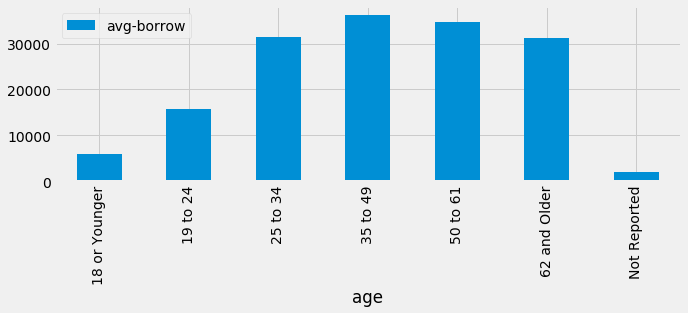

In [259]:
by_age_clean.plot(kind='bar', x='age', y='avg-borrow',figsize=[10,3])

### Portfolios by location

In [260]:
by_location = by_location.drop('Unnamed: 3', axis=1).drop([54,55])
by_location.rename(columns=lambda c: classify(c.strip()), inplace=True)

In [261]:
by_location['borrowers-in-billions'] = by_location['borrowers-in-thousands']*0.000001
by_location['borrower-avg'] = by_location['balance-in-billions']/by_location['borrowers-in-billions']
by_location.head()

,location,balance-in-billions,borrowers-in-thousands,borrowers-in-billions,borrower-avg
0,Alabama,18.0,547.6,0.000548,32870.708546
1,Alaska,1.9,63.6,0.000064,29874.213836
2,Arizona,24.1,768.2,0.000768,31372.038532
3,Arkansas,10.0,338.0,0.000338,29585.798817
4,California,116.1,3583.3,0.003583,32400.301398


In [262]:
# rename columns to prep for merge
population.rename(columns=lambda c: classify(c), inplace=True)
population = population.rename(columns={'geography':'location'})

# merge location and population data
by_location_with_pop = by_location.merge(population,on='location',how='outer')
by_location_with_pop['population-in-billions'] = by_location_with_pop['population']*.000001
by_location_with_pop['state-balance-adj'] = (by_location_with_pop['balance-in-billions']/by_location_with_pop['population-in-billions'])*100
by_location_with_pop

,location,balance-in-billions,borrowers-in-thousands,borrowers-in-billions,borrower-avg,population,population-in-billions,state-balance-adj
0,Alabama,18.0,547.6,0.000548,32870.708546,4863300.0,4.863300,370.119055
1,Alaska,1.9,63.6,0.000064,29874.213836,741894.0,0.741894,256.101276
2,Arizona,24.1,768.2,0.000768,31372.038532,6931071.0,6.931071,347.709611
3,Arkansas,10.0,338.0,0.000338,29585.798817,2988248.0,2.988248,334.644246
4,California,116.1,3583.3,0.003583,32400.301398,39250017.0,39.250017,295.796050
5,Colorado,23.0,699.3,0.000699,32890.032890,5540545.0,5.540545,415.121617
6,Connecticut,13.3,428.3,0.000428,31053.000233,3576452.0,3.576452,371.876933
7,Delaware,3.4,105.3,0.000105,32288.698955,952065.0,0.952065,357.118474
8,District of Columbia,5.6,112.2,0.000112,49910.873440,681170.0,0.681170,822.114891
9,Florida,75.5,2237.6,0.002238,33741.508759,20612439.0,20.612439,366.283679


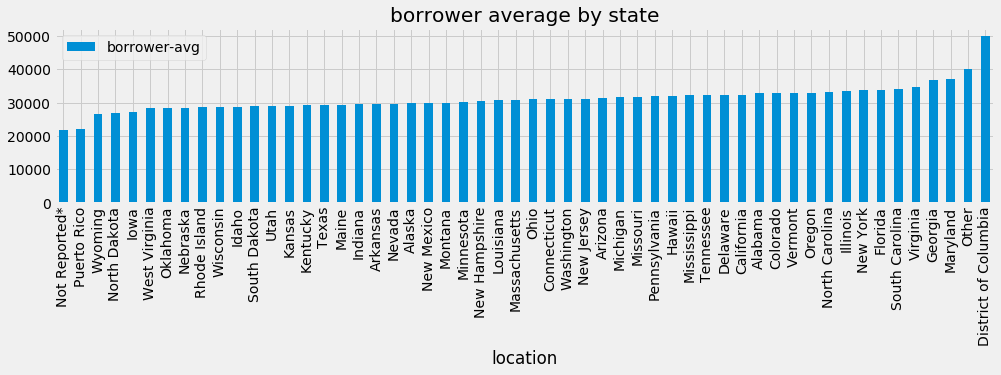

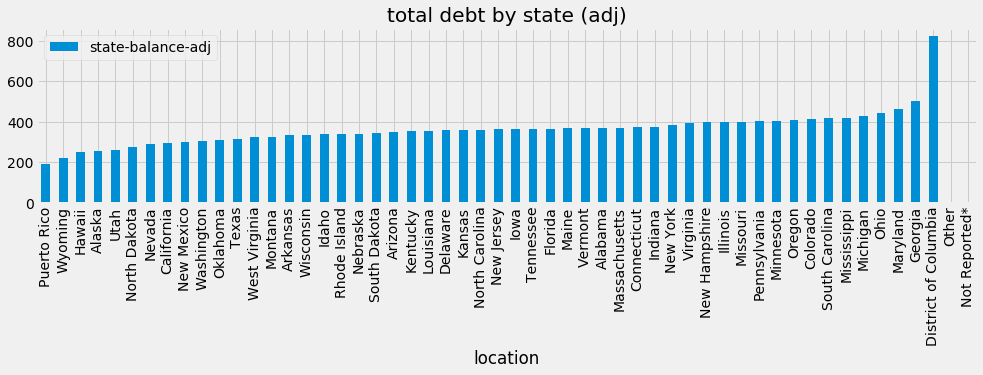

In [274]:
by_location_with_pop.to_csv('exports/data/borrower_locations.csv')
by_location.sort_values('borrower-avg').plot(kind='bar', x='location', y='borrower-avg',figsize=[15,3],title='borrower average by state')
by_location_with_pop.sort_values('state-balance-adj').plot(kind='bar',x='location',y='state-balance-adj',figsize=[15,3],title='total debt by state (adj)')

### Portfolio by school type

In [264]:
by_school_type.rename(columns=lambda c: classify(c), inplace=True)
by_school_type

,federal-fiscal-year,federal-fiscal-quarter,public-dollars-outstanding-in-billions,public-recipients-in-millions,private-dollars-outstanding-in-billions,private-recipients-in-millions,proprietary-dollars-outstanding-in-billions,proprietary-recipients-in-millions,foreign-dollars-outstanding-in-billions,foreign-recipients-in-millions,other-dollars-outstanding-in-billions,other-recipients-in-millions,unnamed:-12,unnamed:-13
0,2017,Q2,$563.8,23.9,$434.7,12.8,$221.6,11.7,$13.5,0.1,$106.9,9.0,NaN,NaN
1,2017,Q3,$561.7,23.6,$435.0,12.7,$224.2,11.7,$13.7,0.1,$107.5,9.0,NaN,NaN


In [265]:
by_school_type_latest

,type,outstanding_dollars_billions,amt_people_millions
0,public,561.7,23.6
1,private,435.0,12.7
2,proprietary,224.2,11.7
3,foreign,13.7,0.1
4,other,107.5,9.0


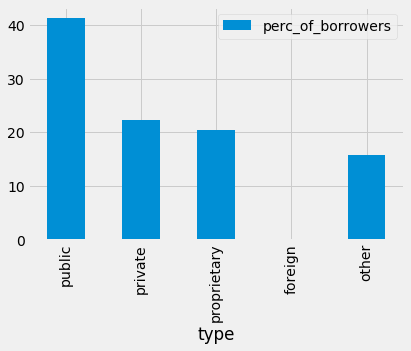

In [266]:
by_school_type_latest['perc_of_borrowers'] = np.vectorize(find_share)(by_school_type_latest['amt_people_millions'],by_school_type_latest['amt_people_millions'].sum())
by_school_type_latest.plot(kind='bar', x='type', y='perc_of_borrowers')

In [267]:
by_school_type_latest

,type,outstanding_dollars_billions,amt_people_millions,perc_of_borrowers
0,public,561.7,23.6,41.33
1,private,435.0,12.7,22.24
2,proprietary,224.2,11.7,20.49
3,foreign,13.7,0.1,0.18
4,other,107.5,9.0,15.76
